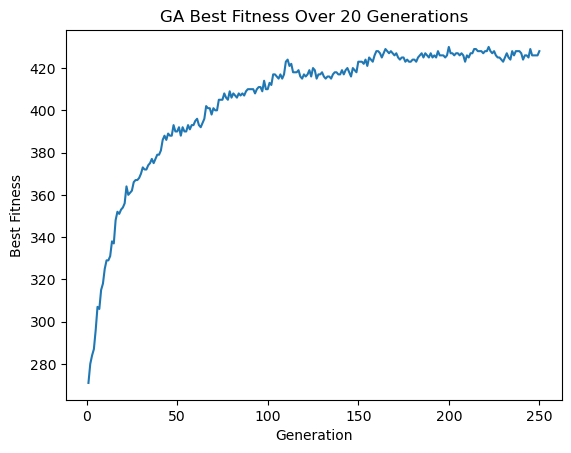

In [41]:
import random
import matplotlib.pyplot as plt

# GA helper functions
def random_chrom(length=5):
    return [random.randint(0, 1) for _ in range(length)]

def fitness(chrom):
    return sum(chrom)

def tournament_selection(pop, k=3):
    return max(random.sample(pop, k), key=fitness)

def crossover(p1, p2, p_cross=0.8):
    if random.random() < p_cross:
        pt = random.randrange(1, len(p1))
        return p1[:pt] + p2[pt:], p2[:pt] + p1[pt:]
    return p1[:], p2[:]

def mutate(chrom, p_mut=0.01):
    return [gene ^ 1 if random.random() < p_mut else gene for gene in chrom]

# GA parameters
pop_size = 70
chrom_length = 500
generations = 250

# Initialize population
pop = [random_chrom(chrom_length) for _ in range(pop_size)]
best_fitness = []

# Run GA
for gen in range(generations):
    scores = [fitness(c) for c in pop]
    best_fitness.append(max(scores))
    
    # Create new generation
    new_pop = []
    while len(new_pop) < pop_size:
        parent1 = tournament_selection(pop)
        parent2 = tournament_selection(pop)
        child1, child2 = crossover(parent1, parent2)
        new_pop.append(mutate(child1))
        if len(new_pop) < pop_size:
            new_pop.append(mutate(child2))
    pop = new_pop

# Plot best fitness over time
plt.plot(range(1, generations + 1), best_fitness)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('GA Best Fitness Over 20 Generations')
plt.show()
